# Randomly Visualize Top 1000 Samples
This notebook selects random samples from `dataset_qwen_pe_top1000.json` and displays the source, edit, reference (ground truth), and mask.

In [14]:
import json
import random
import os
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Configuration
JSON_PATH = '../dataset_qwen_pe_test_remains.json'
BASE_DIR = '../pico-banana-400k-subject_driven/openimages'
NUM_SAMPLES = 5

In [15]:
if not os.path.exists(JSON_PATH):
    print(f"Error: {JSON_PATH} not found.")
else:
    with open(JSON_PATH, 'r') as f:
        dataset = json.load(f)
    print(f"Loaded {len(dataset)} samples.")

Loaded 444 samples.


In [16]:
def show_samples(n=5):
    samples = random.sample(dataset, min(n, len(dataset)))
    
    for i, item in enumerate(samples):
        print(f"\nSample {i+1}:")
        print(f"Edit Type: {item.get('edit_type', 'unknown')}")
        print(f"Prompt: {item['prompt']}")
        
        img_paths = [
            item['image'],
            item['edit_image'][0],
            item['ref_gt'],
            item['back_mask']
        ]
        titles = ['Source', 'Edited', 'Ref GT', 'Mask']
        
        fig, axes = plt.subplots(1, 4, figsize=(20, 5))
        
        for ax, rel_p, title in zip(axes, img_paths, titles):
            full_p = os.path.join(BASE_DIR, rel_p)
            if os.path.exists(full_p):
                img = Image.open(full_p)
                if title == 'Mask':
                    ax.imshow(img, cmap='gray')
                else:
                    ax.imshow(img)
            else:
                ax.text(0.5, 0.5, 'MISSING', ha='center', va='center', color='red')
            ax.set_title(title)
            ax.axis('off')
        
        plt.tight_layout()
        plt.show()


Sample 1:
Edit Type: Add a new object to the scene
Prompt: Picture 1 is the image to modify. Add glasses in bottom left, partly over the headline, casting a soft shadow.


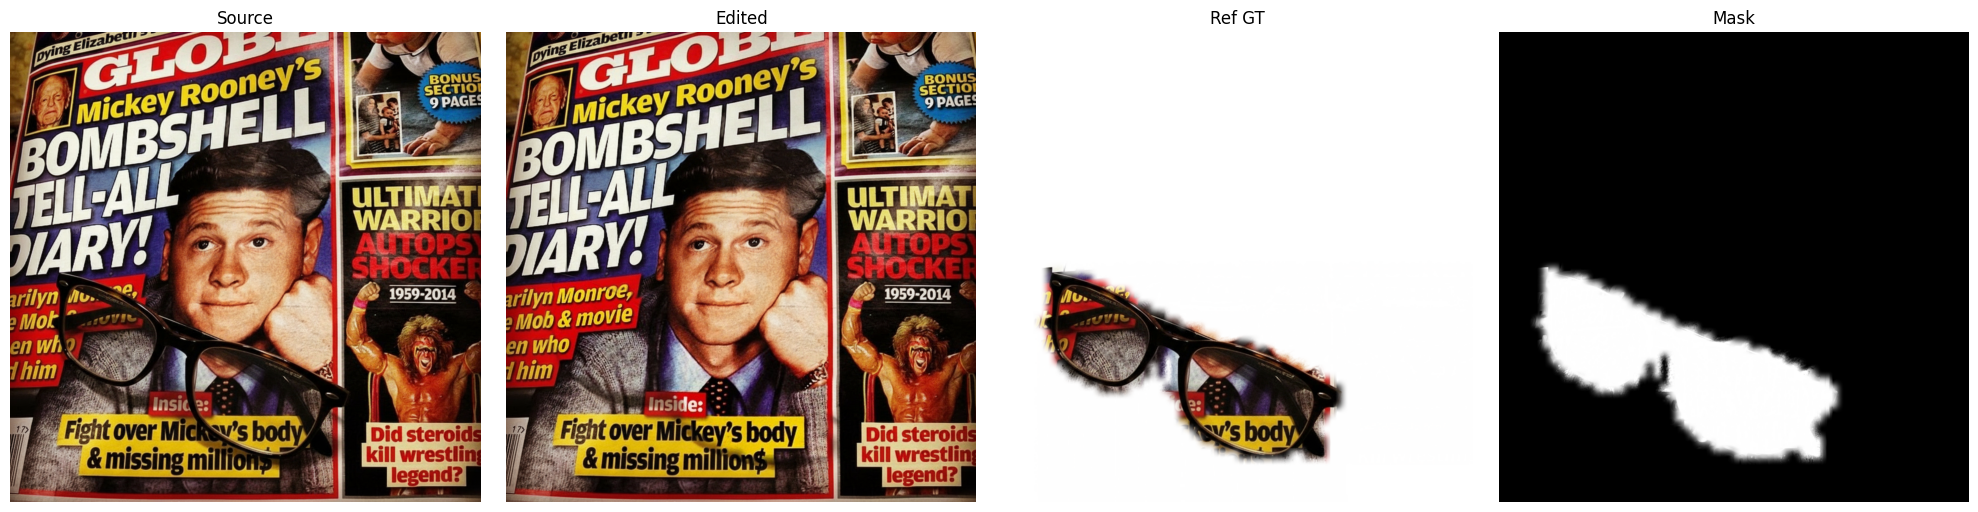


Sample 2:
Edit Type: Add a new object to the scene
Prompt: Picture 1 is the image to modify. Add a warmly lit Yakatabune to the mid-ground, reflecting lights on the water and matching the city's nighttime vibe.


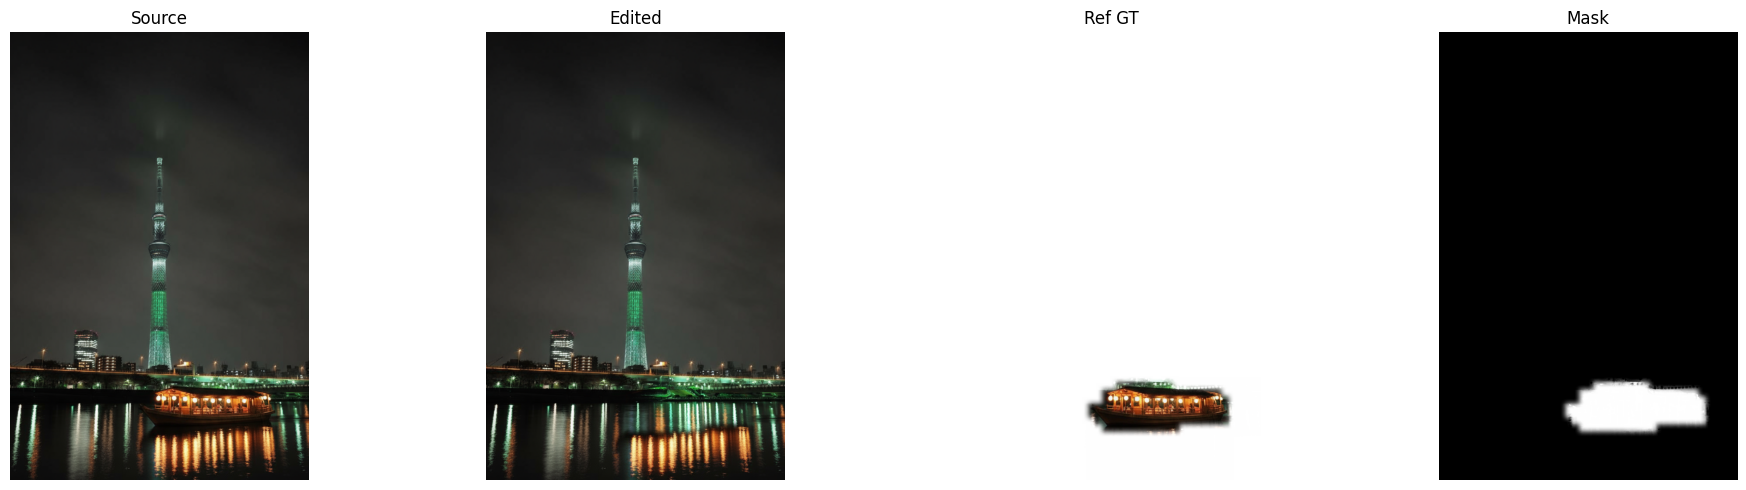


Sample 3:
Edit Type: Replace one object category with another
Prompt: Picture 1 is the image to modify. Add vibrant green vertical gardens to the concrete walls, blending seamlessly with the existing lines.


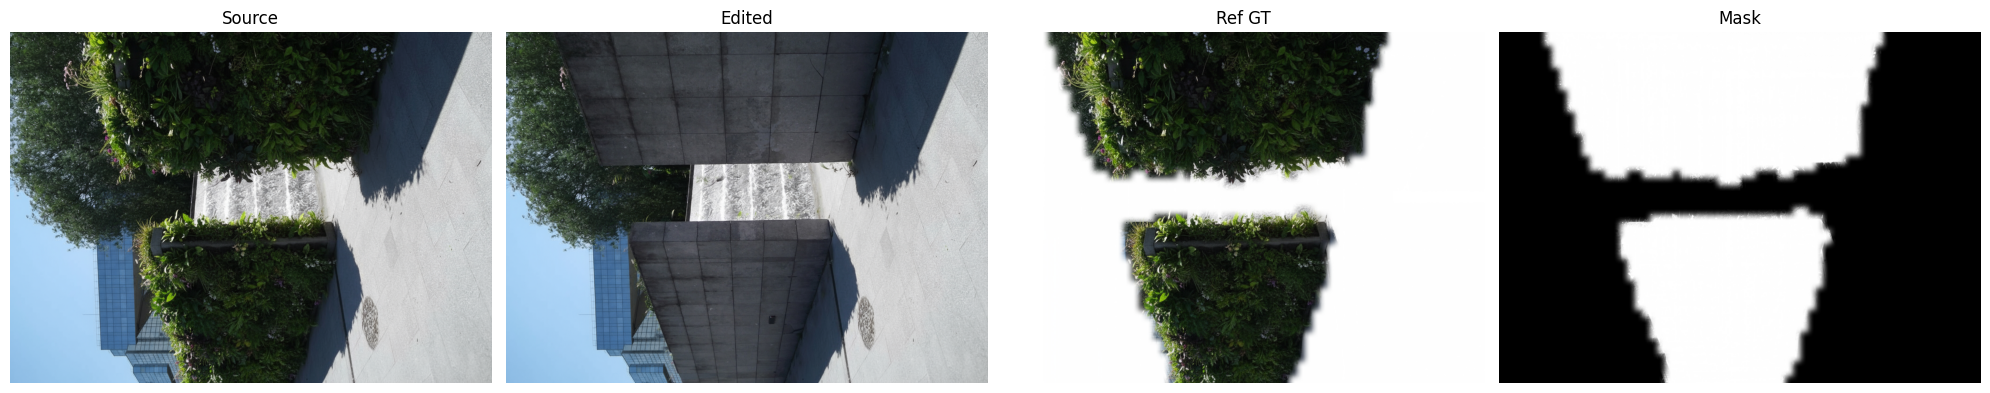


Sample 4:
Edit Type: Remove an existing object
Prompt: Picture 1 is the image to modify. Remove the dark grey cat, seamlessly inpaint the striped blanket and person's lap to match the surroundings.


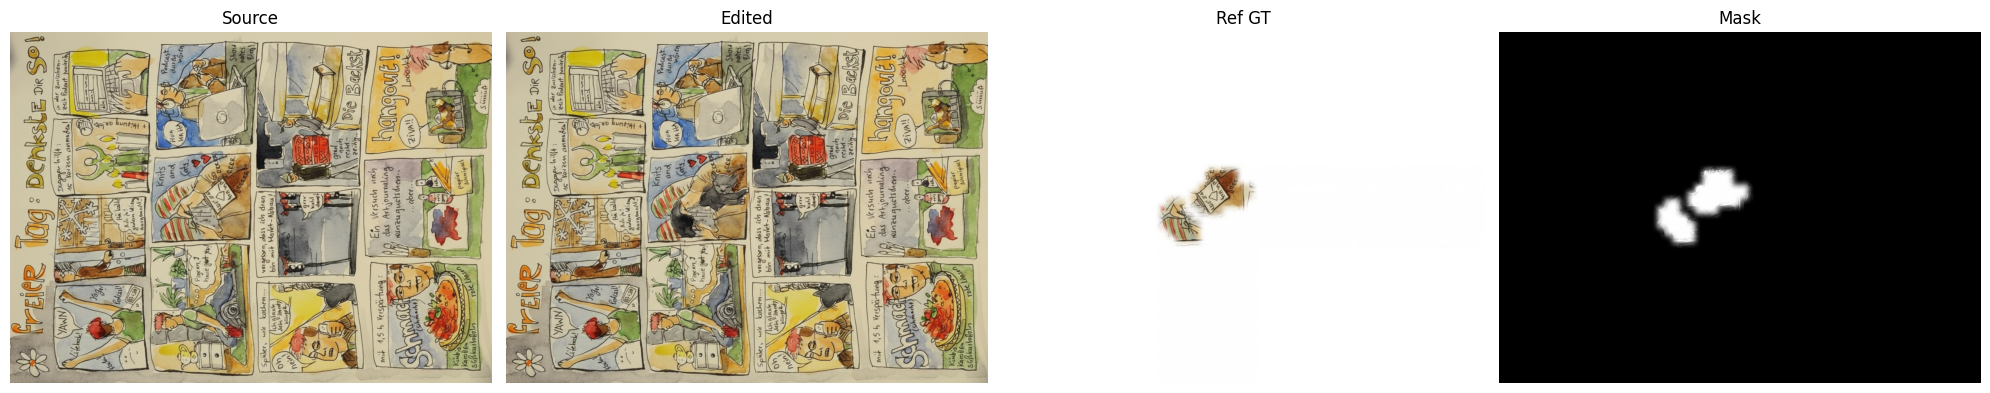


Sample 5:
Edit Type: Replace one object category with another
Prompt: Picture 1 is the image to modify. Change the tall cacti to three large fan palms with detailed trunks and fronds, integrating them naturally into the sand with shadows.


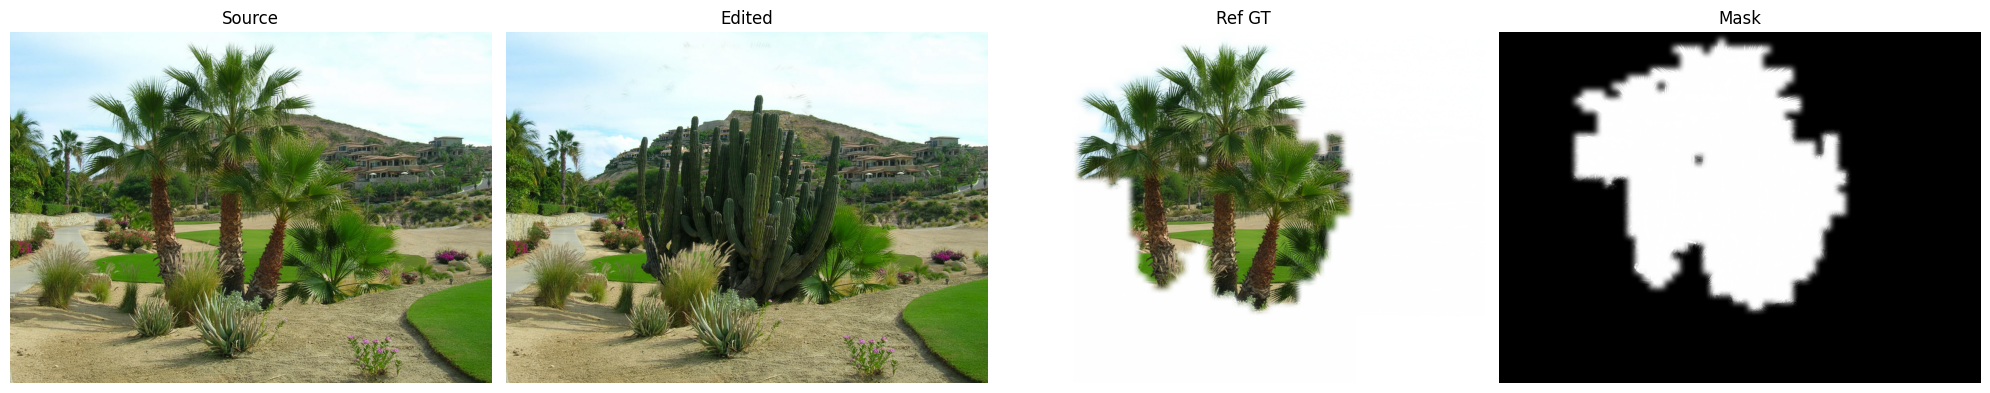

In [19]:
show_samples(NUM_SAMPLES)